In [59]:
import os
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

### 0. Load Data

In [2]:
path_info = '../archive_googleplaystore/googleplaystore.csv'
path_review = '../archive_googleplaystore/googleplaystore_user_reviews.csv'

In [3]:
app_info = pd.read_csv(path_info, index_col='App')
app_review = pd.read_csv(path_review)

In [4]:
app_info.head()

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
App,,,,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
app_review.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


### 1. Preprocessing


#### 1-1. drop nulls, columns , rows

In [6]:
# info data: not much null data(except rating)
app_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10841 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10841 non-null  object 
 1   Rating          9367 non-null   float64
 2   Reviews         10841 non-null  object 
 3   Size            10841 non-null  object 
 4   Installs        10841 non-null  object 
 5   Type            10840 non-null  object 
 6   Price           10841 non-null  object 
 7   Content Rating  10840 non-null  object 
 8   Genres          10841 non-null  object 
 9   Last Updated    10841 non-null  object 
 10  Current Ver     10833 non-null  object 
 11  Android Ver     10838 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1.1+ MB


In [7]:
# review data: 행 별로 정보가 아예 있거나 없거나
app_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [8]:
# null 있는 행 제거
app_review.dropna(axis =0, inplace = True)

In [9]:
# Type, Android/Current Ver columns drop
app_info.drop(['Type', 'Android Ver', 'Current Ver'], axis =1, inplace =True)

In [10]:
# Strange Row data 
display(app_info[app_info['Reviews'] =='3.0M'])
# Drop row
app_info.drop(app_info[app_info['Reviews'] =='3.0M'].index, axis =0, inplace =True)

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
App,,,,,,,,,
Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,Everyone,NaN,"February 11, 2018",1.0.19


#### 1-2. String to Float

In [11]:
app_info.head()

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",0,Everyone,Art & Design,"January 7, 2018"
Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",0,Everyone,Art & Design,"August 1, 2018"
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",0,Teen,Art & Design,"June 8, 2018"
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [12]:
app_info['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [13]:
def size_converter(x):
    if 'M' in x:
        return(float(x[:-1])*1000000)
    elif 'k' in x:
        return(float(x[:-1])*1000)
    else:
        return np.nan

def price_converter(x):
    if x != '0':
        return (float(x[1:]))
    else:
        return(0)
def install_converter(x):
    return float(x.replace('+','').replace(',',''))

In [14]:
app_info['Size']= app_info['Size'].apply(size_converter)
app_info['Price'] = app_info['Price'].apply(price_converter)
app_info['Installs'] = app_info['Installs'].apply(install_converter)

In [15]:
app_info

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,0.0,Everyone,Art & Design,"January 7, 2018"
Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,0.0,Everyone,Art & Design,"August 1, 2018"
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,0.0,Teen,Art & Design,"June 8, 2018"
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,0.0,Everyone,Education,"July 25, 2017"
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,0.0,Everyone,Education,"July 6, 2018"
Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000.0,0.0,Everyone,Medical,"January 20, 2017"


In [16]:
app_info.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, Photo Editor & Candy Camera & Grid & ScrapBook to iHoroscope - 2018 Daily Horoscope & Astrology
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        10840 non-null  object 
 1   Rating          9366 non-null   float64
 2   Reviews         10840 non-null  object 
 3   Size            9145 non-null   float64
 4   Installs        10840 non-null  float64
 5   Price           10840 non-null  float64
 6   Content Rating  10840 non-null  object 
 7   Genres          10840 non-null  object 
 8   Last Updated    10840 non-null  object 
dtypes: float64(4), object(5)
memory usage: 846.9+ KB


In [17]:
## 해야할 전처리!: rating, Size null 처리

In [535]:
ent = app_info[app_info['Category'] == 'ENTERTAINMENT']
ent = photo = pd.concat([pd.get_dummies(ent,columns = ['Content Rating']), ent['Content Rating']], axis = 1)

In [534]:
edu = app_info[app_info['Category'] == 'EDUCATION']
edu = photo = pd.concat([pd.get_dummies(edu,columns = ['Content Rating']), edu['Content Rating']], axis = 1)

In [533]:
game = app_info[app_info['Category'] == 'GAME']
game = photo = pd.concat([pd.get_dummies(game,columns = ['Content Rating']), game['Content Rating']], axis = 1)

In [531]:
pho = app_info[app_info['Category'] == 'PHOTOGRAPHY']
photo = pd.concat([pd.get_dummies(pho,columns = ['Content Rating']), pho['Content Rating']], axis = 1)

In [536]:
shop = app_info[app_info['Category'] == 'SHOPPING']
shop = photo = pd.concat([pd.get_dummies(shop,columns = ['Content Rating']), shop['Content Rating']], axis = 1)

In [101]:
top_total = app_info.sort_values('Installs', ascending = False).head(1000)
bot_total = app_info.sort_values('Installs',ascending = False).tail(1000)

In [105]:
top_t = top_total.mean()
bot_t = bot_total.mean()

C:\Users\82107\AppData\Local\Temp/ipykernel_30612/218736675.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top_t = top_total.mean()
C:\Users\82107\AppData\Local\Temp/ipykernel_30612/218736675.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bot_t = bot_total.mean()


In [112]:
bot_t.index

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price'], dtype='object')

In [215]:
a = pd.DataFrame(top_t).rename(columns={0:'상위 10 %'})
b = pd.DataFrame(bot_t).rename(columns={0:'하위 10 %'})

In [216]:
c =pd.concat([a,b], axis = 1).drop('Reviews', axis =0 )

In [217]:
c

,상위 10 %,하위 10 %
Rating,4.368200e+00,4.471774e+00
Size,4.272308e+07,1.423177e+07
Installs,1.510700e+08,3.908700e+01
Price,0.000000e+00,2.148680e+00


In [223]:
c.loc['Rating'] = c.loc['Rating'].apply(lambda x : round(x, 2) )
c.loc['Size'] = c.loc['Size'].apply(lambda x: ((x // 1e+6) * 1e+6))
c.loc['Installs']['상위 10 %'] = (c.loc['Installs']['상위 10 %']) // 1e+6 * 1e+6
c.loc['Installs']['하위 10 %'] = (c.loc['Installs']['하위 10 %']) // 10 * 10
c.loc['Price']= c.loc['Price'].apply(lambda x : x // 0.1 * 0.1)

In [233]:
d = c.iloc[[0,3],:]

In [80]:
top = ent.sort_values('Installs',ascending= False).head(20)
bot = ent.sort_values('Installs',ascending= False).tail(20)

In [ ]:
edu.gr

<AxesSubplot:xlabel='Installs'>

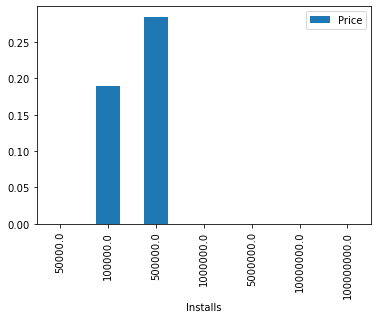

In [630]:
pd.DataFrame(edu.groupby('Installs')['Price'].mean()).iloc[2:].plot(kind = 'bar')

In [648]:
app_info

,Category,Rating,Reviews,Size,Installs,Price,Content Rating,Genres,Last Updated
App,,,,,,,,,
Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,0.0,Everyone,Art & Design,"January 7, 2018"
Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,0.0,Everyone,Art & Design,"August 1, 2018"
Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,0.0,Teen,Art & Design,"June 8, 2018"
Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"
...,...,...,...,...,...,...,...,...,...
Sya9a Maroc - FR,FAMILY,4.5,38,53000000.0,5000.0,0.0,Everyone,Education,"July 25, 2017"
Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3600000.0,100.0,0.0,Everyone,Education,"July 6, 2018"
Parkinson Exercices FR,MEDICAL,NaN,3,9500000.0,1000.0,0.0,Everyone,Medical,"January 20, 2017"


In [646]:
app_info[app_info['Category'] == 'EDUCATION']['Reviews']

App
Duolingo: Learn Languages Free                                                   6289924
TED                                                                               181893
English Communication - Learn English for Chinese (Learn English for Chinese)       2544
Khan Academy                                                                       85375
Learn English with Wlingua                                                        314299
                                                                                  ...   
Blinkist - Nonfiction Books                                                        16103
Sago Mini Hat Maker                                                                   11
Fuzzy Numbers: Pre-K Number Foundation                                                21
Toca Life: City                                                                    31085
Toca Life: Hospital                                                                 3528
Name: Reviews, Le

Text(0, 0.5, 'Rating')

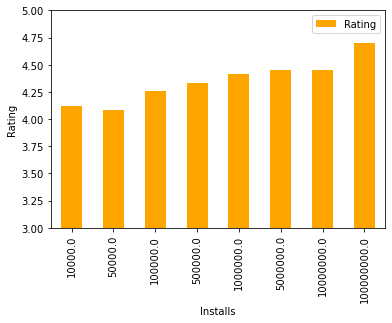

In [667]:
pd.DataFrame(edu.groupby('Installs').mean()['Rating'].iloc[1:]).plot(kind = 'bar', color = 'orange')
plt.ylim(3,5)
plt.ylabel('Rating')

In [669]:
edu.groupby('Installs').mean()

,Rating,Size,Price,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
Installs,,,,,,,
1000.0,4.800000,5.350000e+07,4.990,1.000000,0.000000,0.000000,0.000000
10000.0,4.120000,7.936400e+06,0.000,1.000000,0.000000,0.000000,0.000000
50000.0,4.083333,1.384000e+07,0.000,0.833333,0.000000,0.166667,0.000000
100000.0,4.255000,1.668000e+07,0.190,1.000000,0.000000,0.000000,0.000000
500000.0,4.335714,1.420833e+07,0.285,1.000000,0.000000,0.000000,0.000000
1000000.0,4.415385,1.833171e+07,0.000,0.903846,0.038462,0.038462,0.019231
5000000.0,4.450000,3.680625e+07,0.000,1.000000,0.000000,0.000000,0.000000
10000000.0,4.450000,2.204667e+07,0.000,0.800000,0.200000,0.000000,0.000000
100000000.0,4.700000,NaN,0.000,1.000000,0.000000,0.000000,0.000000


In [632]:
edu.groupby('Installs')['Price'].mean()

Installs
1000.0         4.990
10000.0        0.000
50000.0        0.000
100000.0       0.190
500000.0       0.285
1000000.0      0.000
5000000.0      0.000
10000000.0     0.000
100000000.0    0.000
Name: Price, dtype: float64

In [594]:
a.index

Float64Index([     10000.0,      50000.0,     100000.0,     500000.0,
                 1000000.0,    5000000.0,   10000000.0,   50000000.0,
               100000000.0, 1000000000.0],
             dtype='float64', name='Installs')

C:\Users\82107\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 100000000.0)

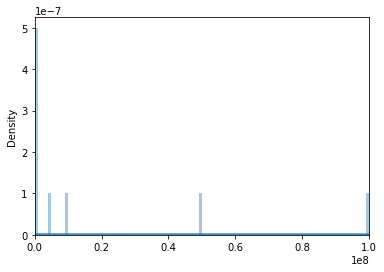

In [608]:
a = pd.DataFrame(ent.groupby('Installs')['Price'].mean())
sns.distplot(a, x= a.index, bins = 1000)
plt.xlim(0,1e+8)

C:\Users\82107\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ValueError: could not convert string to float: 'Installs'

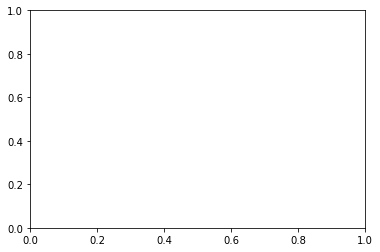

In [581]:
sns.distplot(ent.groupby('Installs')['Price'].mean(), color = 'g' )
plt.xlim(0,1.2)
plt.ylabel('Price')
plt

In [562]:
ent.groupby('Installs').mean()[]

,Rating,Size,Price,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
Installs,,,,,,,
1.000000e+04,4.300000,4.400000e+07,0.000000,0.000000,0.000000,0.000000,1.000000
5.000000e+04,3.000000,2.300000e+07,0.000000,1.000000,0.000000,0.000000,0.000000
1.000000e+05,4.236364,2.535556e+07,0.725455,0.454545,0.000000,0.090909,0.454545
5.000000e+05,4.075000,1.700000e+07,0.000000,0.250000,0.000000,0.000000,0.750000
1.000000e+06,4.113725,2.001538e+07,0.000000,0.196078,0.019608,0.058824,0.725490
5.000000e+06,4.070588,1.613750e+07,0.000000,0.294118,0.000000,0.000000,0.705882
1.000000e+07,4.106250,2.204091e+07,0.000000,0.250000,0.083333,0.104167,0.562500
5.000000e+07,4.340000,3.266667e+07,0.000000,0.600000,0.000000,0.000000,0.400000
1.000000e+08,4.250000,2.900000e+07,0.000000,0.200000,0.000000,0.000000,0.800000


In [553]:
photo.groupby('Installs').mean()


,Rating,Size,Price,Content Rating_Everyone,Content Rating_Mature 17+,Content Rating_Teen
Installs,,,,,,
5.0,NaN,1.000000e+07,0.000000,1.000000,0.000000,0.000000
10.0,4.750000,2.514000e+06,0.000000,1.000000,0.000000,0.000000
100.0,4.360000,7.791667e+06,0.207500,0.833333,0.000000,0.166667
500.0,4.700000,7.533333e+06,0.000000,1.000000,0.000000,0.000000
1000.0,3.525000,8.836750e+06,0.000000,1.000000,0.000000,0.000000
5000.0,4.120000,5.760000e+06,0.000000,1.000000,0.000000,0.000000
10000.0,3.970000,6.065727e+06,0.271818,1.000000,0.000000,0.000000
50000.0,4.375000,1.385000e+07,0.000000,0.750000,0.000000,0.250000
100000.0,4.015000,1.332026e+07,0.000000,0.950000,0.050000,0.000000


In [542]:
photo.groupby('Installs').mean()

,Rating,Size,Price,Content Rating_Everyone,Content Rating_Mature 17+,Content Rating_Teen
Installs,,,,,,
5.0,NaN,1.000000e+07,0.000000,1.000000,0.000000,0.000000
10.0,4.750000,2.514000e+06,0.000000,1.000000,0.000000,0.000000
100.0,4.360000,7.791667e+06,0.207500,0.833333,0.000000,0.166667
500.0,4.700000,7.533333e+06,0.000000,1.000000,0.000000,0.000000
1000.0,3.525000,8.836750e+06,0.000000,1.000000,0.000000,0.000000
5000.0,4.120000,5.760000e+06,0.000000,1.000000,0.000000,0.000000
10000.0,3.970000,6.065727e+06,0.271818,1.000000,0.000000,0.000000
50000.0,4.375000,1.385000e+07,0.000000,0.750000,0.000000,0.250000
100000.0,4.015000,1.332026e+07,0.000000,0.950000,0.050000,0.000000


In [539]:
photo.groupby('Content Rating').mean()

,Rating,Size,Installs,Price,Content Rating_Everyone,Content Rating_Mature 17+,Content Rating_Teen
Content Rating,,,,,,,
Everyone,4.239037,1.556185e+07,6.570666e+06,0.026346,1.0,0.0,0.0
Mature 17+,4.266667,1.280000e+07,5.033333e+06,0.000000,0.0,1.0,0.0
Teen,4.339583,2.026239e+07,3.808266e+07,0.000000,0.0,0.0,1.0


In [408]:
ent.groupby('Installs').mean()

,Rating,Size,Price
Installs,,,
1.000000e+04,4.300000,4.400000e+07,0.000000
5.000000e+04,3.000000,2.300000e+07,0.000000
1.000000e+05,4.236364,2.535556e+07,0.725455
5.000000e+05,4.075000,1.700000e+07,0.000000
1.000000e+06,4.113725,2.001538e+07,0.000000
5.000000e+06,4.070588,1.613750e+07,0.000000
1.000000e+07,4.106250,2.204091e+07,0.000000
5.000000e+07,4.340000,3.266667e+07,0.000000
1.000000e+08,4.250000,2.900000e+07,0.000000


In [443]:
ent = pd.get_dummies(ent,columns = ['Content Rating'])

,Category,Rating,Reviews,Size,Installs,Price,Genres,Last Updated,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
App,,,,,,,,,,,,
Netflix,ENTERTAINMENT,4.4,5456208,NaN,100000000.0,0.00,Entertainment,"July 31, 2018",0,0,0,1
Complete Spanish Movies,ENTERTAINMENT,4.0,11656,4500000.0,1000000.0,0.00,Entertainment,"January 20, 2018",1,0,0,0
Pluto TV - It’s Free TV,ENTERTAINMENT,4.2,28948,NaN,1000000.0,0.00,Entertainment,"August 4, 2018",0,0,0,1
Tubi TV - Free Movies & TV,ENTERTAINMENT,4.3,296771,11000000.0,10000000.0,0.00,Entertainment,"July 15, 2018",0,0,0,1
YouTube Kids,ENTERTAINMENT,4.5,470089,NaN,50000000.0,0.00,Entertainment;Music & Video,"August 3, 2018",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
Meme Creator,ENTERTAINMENT,4.2,38769,44000000.0,1000000.0,0.00,Entertainment,"September 22, 2015",0,0,1,0
"Imgur: Find funny GIFs, memes & watch viral videos",ENTERTAINMENT,4.3,160164,12000000.0,10000000.0,0.00,Entertainment,"August 1, 2018",0,0,0,1
Meme Generator,ENTERTAINMENT,4.6,3771,53000000.0,100000.0,2.99,Entertainment,"August 3, 2018",0,0,1,0


In [471]:
a

,Installs
Content Rating,
Everyone,3.421633e+07
Everyone 10+,7.198366e+07
Mature 17+,1.438679e+07
Teen,1.144415e+07


<AxesSubplot:xlabel='Content Rating'>

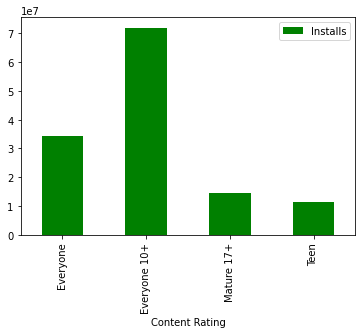

In [504]:
a.plot(kind = 'bar', color ='g')

In [464]:
pd.DataFrame(game.groupby('Content Rating').mean()['Installs']

,Installs
Content Rating,
Everyone,3.421633e+07
Everyone 10+,7.198366e+07
Mature 17+,1.438679e+07
Teen,1.144415e+07


In [508]:
game.groupby('Installs').mean()

,Rating,Size,Price
Installs,,,
1.000000e+00,5.000000,1.666667e+07,1.090000
5.000000e+00,5.000000,2.400000e+07,0.000000
1.000000e+01,4.750000,2.311429e+07,0.066000
5.000000e+01,4.520000,2.402000e+07,0.180909
1.000000e+02,4.557143,2.208462e+07,1.163704
5.000000e+02,4.166667,2.038333e+07,0.456667
1.000000e+03,4.045455,2.570228e+07,0.812250
5.000000e+03,4.094118,2.174706e+07,0.586471
1.000000e+04,4.026562,3.080794e+07,1.185625


In [ ]:
game

In [ ]:
photo.groupby('Content Rating')

In [519]:
photo.groupby('Installs').mean()

,Rating,Size,Price,Content Rating_Everyone,Content Rating_Mature 17+,Content Rating_Teen
Installs,,,,,,
5.000000e+00,NaN,8.400000e+06,0.000000,1.000000,0.000000,0.000000
1.000000e+01,4.000000,2.572600e+06,8.094000,0.800000,0.000000,0.200000
5.000000e+01,NaN,3.900000e+07,0.000000,1.000000,0.000000,0.000000
1.000000e+02,4.200000,8.466667e+06,0.932000,1.000000,0.000000,0.000000
5.000000e+02,4.580000,8.483333e+06,0.248333,1.000000,0.000000,0.000000
1.000000e+03,3.873333,1.067778e+07,1.831667,0.888889,0.000000,0.111111
5.000000e+03,3.640000,8.240000e+06,0.598000,0.800000,0.000000,0.200000
1.000000e+04,3.746667,5.210533e+06,0.465333,1.000000,0.000000,0.000000
5.000000e+04,3.871429,8.066667e+06,0.284286,1.000000,0.000000,0.000000


Text(0, 0.5, 'Size')

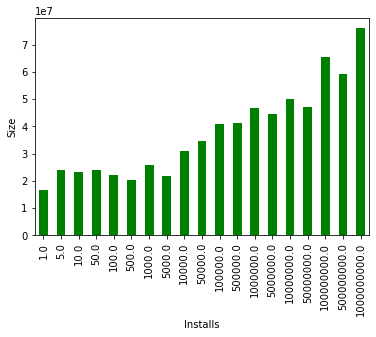

In [516]:
game.groupby("Installs").mean()['Size'].plot(kind = 'bar', color = 'g')

plt.ylabel('Size')

<AxesSubplot:xlabel='Installs', ylabel='Rating'>

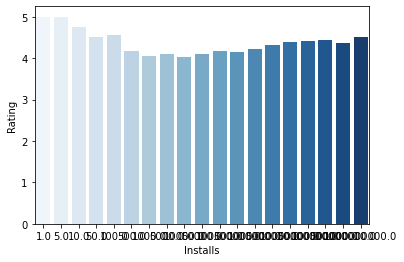

In [396]:
sns.barplot(x = game.groupby('Installs').mean()['Rating'].index ,y = game.groupby('Installs').mean()['Rating'], palette= 'Blues')

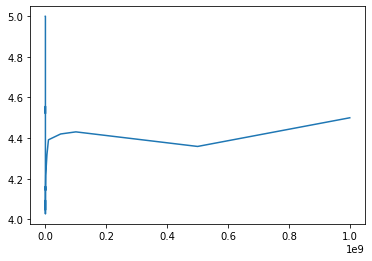

In [402]:
plt.plot(game.groupby('Installs').mean()['Rating'])

In [360]:
di = pd.DataFrame(ent.groupby('Installs')['Price'].mean())
sns.(di.values, x = di.index)
plt.xlim(0,1e+9)
plt.xlabel('Installs')

TypeError: distplot() got an unexpected keyword argument 'y'

In [265]:
sns.distplot(x = 'Installs',y = 'Price',data = pd.DataFrame(ent.groupby('Installs')['Price'].mean()).reset_index())

TypeError: distplot() got an unexpected keyword argument 'y'

In [250]:
bot.mean()

C:\Users\82107\AppData\Local\Temp/ipykernel_30612/1276005127.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bot.mean()


Rating      4.140000e+00
Reviews     1.153164e+78
Size        2.388750e+07
Installs    3.080000e+05
Price       3.990000e-01
dtype: float64

In [249]:
top.mean()

C:\Users\82107\AppData\Local\Temp/ipykernel_30612/3841264453.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  top.mean()


Rating       4.225000e+00
Reviews     3.582681e+126
Size         2.645455e+07
Installs     1.145000e+08
Price        0.000000e+00
dtype: float64

<AxesSubplot:xlabel='App', ylabel='Price'>

C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\82107\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0, flags=flags)


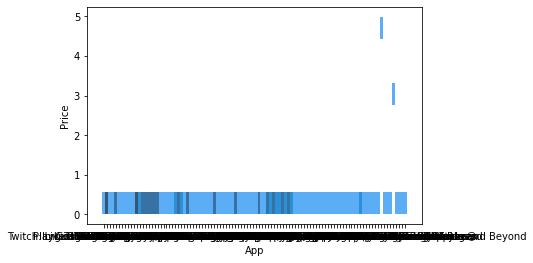

In [66]:
sns.histplot(data = ent.sort_values('Installs',ascending= False)['Price'].reset_index(), x ='App', y = 'Price' )

(array([147.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([0.   , 0.499, 0.998, 1.497, 1.996, 2.495, 2.994, 3.493, 3.992,
        4.491, 4.99 ]),
 <BarContainer object of 10 artists>)

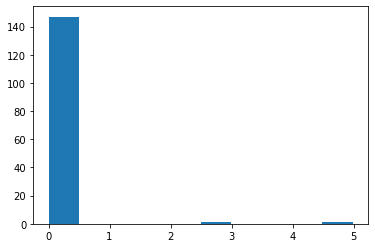

In [64]:
plt.hist(ent.sort_values('Installs',ascending= False)['Price'],)

In [52]:
a.groupby('Category').mean()

,Rating,Size,Installs,Price
Category,,,,
EDUCATION,4.389032,2.079083e+07,5.586231e+06,0.115128
ENTERTAINMENT,4.126174,2.185333e+07,1.925611e+07,0.053557
GAME,4.286326,4.437010e+07,3.066960e+07,0.251136
PHOTOGRAPHY,4.192114,1.736767e+07,3.011417e+07,0.400627
SHOPPING,4.259664,1.617543e+07,1.249173e+07,0.021077


In [39]:
a.groupby('Category').mean()

,Rating,Size,Installs,Price
Category,,,,
EDUCATION,4.389032,2.079083e+07,5.586231e+06,0.115128
ENTERTAINMENT,4.126174,2.185333e+07,1.925611e+07,0.053557
GAME,4.286326,4.437010e+07,3.066960e+07,0.251136
PHOTOGRAPHY,4.192114,1.736767e+07,3.011417e+07,0.400627
SHOPPING,4.259664,1.617543e+07,1.249173e+07,0.021077


In [230]:
app_info.to_csv(path_info[:-4]+'_preprocessed.csv')
app_review.to_csv(path_info[:-4]+'_preprocessed.csv')

In [ ]:
a = 
path_info[:-4]+'_preprocessed.csv'